In [96]:
import numpy as np
import math
import scipy.linalg # expm
import matplotlib.pyplot as plt

![theory](theory.png)

## Convention

### System

spin x bosons

### Spin

spin down = ground state
- (1, 0)
- PZ * (1, 0) = -1 * (1, 0)

spin up = excited state 
- (0, 1)
- PZ * (0, 1) = 1 * (0, 1)

### Bosons

- 0 bosons (ground state)   = (1, 0, 0)
- 1 boson                   = (0, 1, 0)
- 2 bosons                  = (0, 0, 1)

# Hamiltonian / Unitary

In [97]:
def spin_boson_unitary_6x6(
        dt: float,
        epsilon: float,
        omega: float,
        lambd: float
) -> np.ndarray:
    """Unitary matrix for the spin-boson model with a 6x6 matrix representation.
    One spin and three bosonic levels (0, 1, 2).
    Args:
        dt: timestep size of one unitary
        loops: number of passes through unitary
        epsilon: spin x-field strength
        omega: harmonic oscillator (boson) frequency
        lambd: spin-boson coupling strength
    """
    # Define the Hamiltonian matrix
    h_mat = np.array([
        [-0.5, 0, 0, 0.5*epsilon, lambd, 0],
        [0, -0.5+omega, 0, lambd, 0.5*epsilon, math.sqrt(2)*lambd],
        [0, 0, -0.5+(2*omega), 0, math.sqrt(2)*lambd, 0.5*epsilon],
        [0.5*epsilon, lambd, 0, 0.5, 0, 0],
        [lambd, 0.5*epsilon, math.sqrt(2)*lambd, 0, 0.5+omega, 0],
        [0, math.sqrt(2)*lambd, 0.5*epsilon, 0, 0, 0.5+(2*omega)]
    ])
    # Calculate the unitary matrix
    return scipy.linalg.expm(-1j * h_mat * dt)

In [98]:
unitary = spin_boson_unitary_6x6(dt=0.1, epsilon=1, omega=1, lambd=1)
# unitary = spin_boson_unitary_6x6(dt, epsilon, omega, lambd)

# Simulation

In [99]:
def spin_boson_simulation(
        t: float = 6,
        loops: int = 3,
        epsilon: float = 1,
        omega: float = 1,
        lambd: float = 1,
        init_state: np.ndarray = np.array([1, 0, 0, 0, 0, 0])
) -> tuple[np.ndarray, np.ndarray]:
    """Time evolution of the spin-boson model.
    Args:
        t: total time
        loops: number of passes through unitary
        epsilon: spin x-field strength
        omega: harmonic oscillator (boson) frequency
        lambd: spin-boson coupling strength
        init_state: initial state (spin x boson)
    """
    # dt: timestep size of one unitary
    dt = t / loops
    # get unitary
    unitary = spin_boson_unitary_6x6(dt, epsilon, omega, lambd)
    timesteps = np.arange(0, t+dt, dt)
    probabilities = np.zeros([loops+1, np.shape(unitary)[0]])
    # loop over unitary
    probabilities[0, :] = np.abs(init_state) ** 2
    for t_step in range(1, loops+1):
        init_state = unitary @ init_state
        probabilities[t_step, :] = np.abs(init_state) ** 2
    return timesteps, probabilities

In [100]:
# this might be needed
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [101]:
def plot(timesteps, probabilities):
    fig, ax = plt.subplots()
    ax.plot(timesteps, probabilities)
    ax.set_xlabel('Time')
    ax.set_ylabel('Probability')
    ax.legend([r'$\vert\downarrow 0\rangle$', r'$\vert\downarrow 1\rangle$', 
               r'$\vert\downarrow 2\rangle$', r'$\vert\uparrow 0\rangle$', 
               r'$\vert\uparrow 1\rangle$', r'$\vert\uparrow 2\rangle$'])
    return fig

/var/folders/1q/hnhhvg395bv_wtf5c9xx95cc0000gn/T/ipykernel_14875/4161210610.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


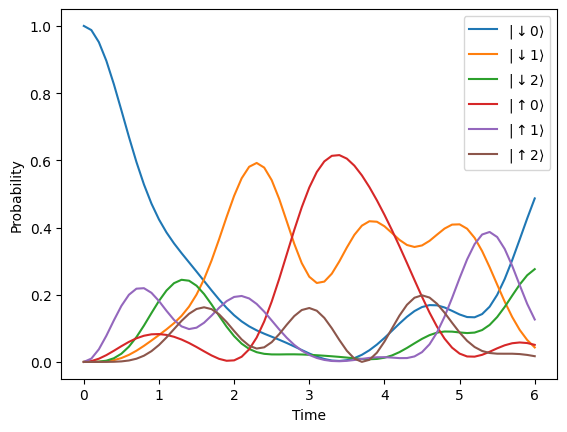

In [102]:
t = 6
loops = 60
epsilon = 1
omega = 1
lambd = 1

timesteps, probabilities = spin_boson_simulation(t, loops, epsilon, omega, lambd)

fig = plot(timesteps, probabilities)
# fig.savefig('test.png')
fig.show()

/var/folders/1q/hnhhvg395bv_wtf5c9xx95cc0000gn/T/ipykernel_14875/1385501710.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


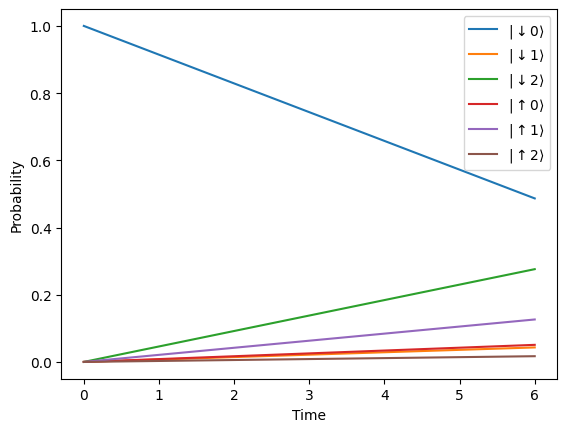

In [103]:
loops = 1
timesteps, probabilities = spin_boson_simulation(t, loops, epsilon, omega, lambd)
fig = plot(timesteps, probabilities)
fig.show()

/var/folders/1q/hnhhvg395bv_wtf5c9xx95cc0000gn/T/ipykernel_14875/4244987311.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


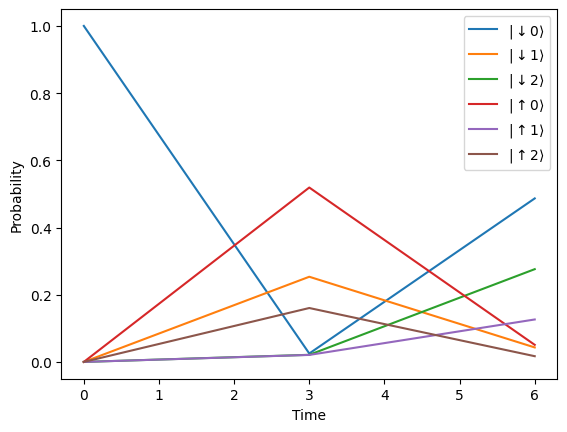

In [104]:
loops = 2
timesteps, probabilities = spin_boson_simulation(t, loops, epsilon, omega, lambd)
fig = plot(timesteps, probabilities)
fig.show()

/var/folders/1q/hnhhvg395bv_wtf5c9xx95cc0000gn/T/ipykernel_14875/2110928051.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


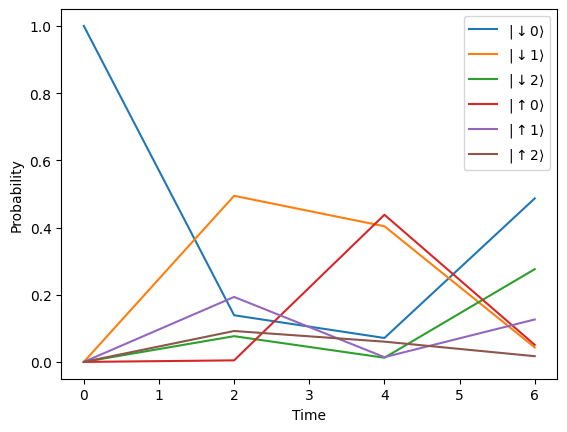

In [105]:
loops = 3
timesteps, probabilities = spin_boson_simulation(t, loops, epsilon, omega, lambd)
fig = plot(timesteps, probabilities)
fig.show()